In [1]:
!git clone https://github.com/maryhc/opinion.git
#%cd /content
#!git pull

Cloning into 'opinion'...
remote: Enumerating objects: 52, done.
remote: Counting objects: 100% (52/52), done.
remote: Compressing objects: 100% (35/35), done.
remote: Total 52 (delta 25), reused 41 (delta 14), pack-reused 0
Unpacking objects: 100% (52/52), done.


In [30]:
#https://medium.com/datos-y-ciencia/preprocesamiento-de-datos-de-texto-un-tutorial-en-python-5db5620f1767
import re, string, unicodedata
import nltk
from nltk import FreqDist
nltk.download('book')
from nltk.book import *
nltk.download('punkt')
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px

[nltk_data] Downloading collection 'book'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown.zip.
[nltk_data]    | Downloading package chat80 to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/chat80.zip.
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package conll2000 to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/conll2000.zip.
[nltk_data]    | Downloading package conll2002 to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/conll2002.zip.
[nltk_data]    | Downloading package dependency_treebank to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/dependency_treebank.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    

In [21]:
#file_name = open('/content/opinion/corpus/tweets.txt').read()
#file_name_mod = file_name.replace(".txt","")
file_name_mod = "tweetsn.txt"
mod_file = open(file_name_mod,"w")
raw_file = open('/content/opinion/corpus/tweets.txt').read()

for x in raw_file:
	xf = x.replace("!"," ")
	xf = x.lower()
	mod_file.write(xf)

In [13]:
def remove_non_ascii(words):
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words      

In [54]:
sample = open('/content/tweetsn.txt').read()
words = nltk.word_tokenize(sample)
words = remove_non_ascii(words)
#sample
md_bigrams = list(bigrams(words))
fdist = FreqDist(md_bigrams)

In [50]:
fdist.most_common(1000)

[(('e', ' '), 32000),
 (('a', ' '), 31273),
 (('o', ' '), 30306),
 (('s', ' '), 27266),
 ((' ', 'e'), 18798),
 (('e', 's'), 18766),
 (('d', 'e'), 18569),
 ((' ', 'd'), 17180),
 (('e', 'n'), 16889),
 (('n', ' '), 15299),
 ((' ', 'p'), 14512),
 (('e', 'r'), 13741),
 ((' ', 'l'), 13280),
 (('u', 'e'), 13173),
 ((' ', 'a'), 12521),
 ((' ', 'c'), 12141),
 (('r', 'a'), 12107),
 (('a', 's'), 11907),
 (('o', 's'), 11816),
 ((' ', 's'), 11271),
 (('a', 'r'), 10917),
 (('a', 'n'), 10337),
 (('l', 'a'), 10233),
 (('t', 'a'), 9972),
 (('o', 'n'), 9958),
 (('t', 'e'), 9821),
 (('l', ' '), 9706),
 (('q', 'u'), 9480),
 (('r', 'e'), 9409),
 (('c', 'o'), 9221),
 (('r', ' '), 9123),
 (('e', 'l'), 9091),
 ((' ', 'm'), 8926),
 (('s', 't'), 8920),
 (('d', 'o'), 8907),
 (('n', 'o'), 8405),
 (('l', 'o'), 8393),
 (('o', 'r'), 8301),
 (('n', 't'), 8201),
 ((' ', 'q'), 8072),
 ((' ', 't'), 7806),
 (('a', 'l'), 7378),
 ((' ', 'n'), 6721),
 (('c', 'i'), 6607),
 (('r', 'o'), 6574),
 (('t', 'o'), 6550),
 (('a', 'd'

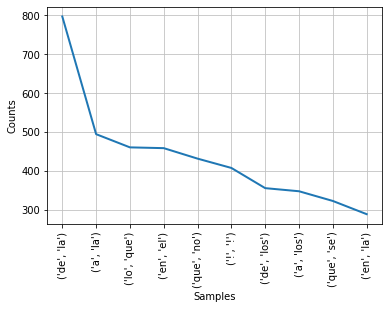

In [55]:
fdist.plot(10)

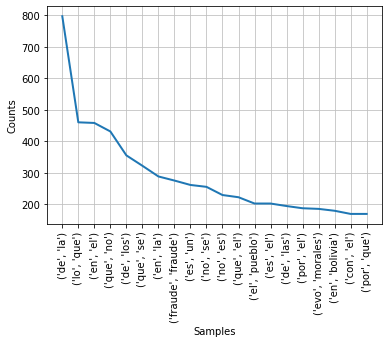

In [57]:
#bigramas
threshold = 1
filtered_bigrams = [bigram for bigram in md_bigrams if len(bigram[0])>threshold and len(bigram[1])>threshold]
filtered_dist = FreqDist(filtered_bigrams)
filtered_dist.plot(20)

In [58]:
#trigramas
from nltk.util import ngrams
md_trigrams = list(ngrams(words,3))
fdist = FreqDist(md_trigrams)
fdist.most_common(10)

[(('fraude', 'fraude', 'fraude'), 264),
 (('golpe', 'de', 'estado'), 134),
 (('en', 'el', 'poder'), 67),
 (('?', '?', '?'), 64),
 (('de', 'lo', 'que'), 51),
 (('hubo', 'fraude', 'hubo'), 48),
 (('fraude', 'hubo', 'fraude'), 47),
 (('por', 'que', 'no'), 46),
 (('es', 'lo', 'que'), 45),
 (('en', 'la', 'carcel'), 42)]

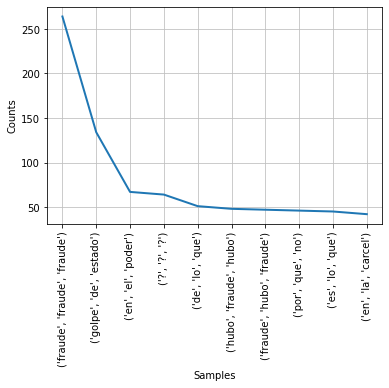

In [59]:
fdist.plot(10) 